In [105]:
import pandas as pd
import numpy as numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU, PReLU
from keras.utils import np_utils
from keras.callbacks import CSVLogger, ModelCheckpoint
import h5py
import os
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session


# Make the program use only one GPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))


with h5py.File(''.join(['bitcoin2015to2017_close.h5']), 'r') as hf:
    datas = hf['inputs'].value
    labels = hf['outputs'].value


output_file_name='bitcoin2015to2017_close_CNN_2_relu'

step_size = datas.shape[1]
batch_size= 8
nb_features = datas.shape[2]

epochs = 200

#split training validation
training_size = int(0.8* datas.shape[0])
training_datas = datas[:training_size,:]
training_labels = labels[:training_size,:]
validation_datas = datas[training_size:,:]
validation_labels = labels[training_size:,:]
#build model

# 2 layers
model = Sequential()


model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=3, filters=8, kernel_size=20))
model.add(Dropout(0.5))
model.add(Conv1D( strides=4, filters=nb_features, kernel_size=16))

'''
# 3 Layers
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=3, filters=8, kernel_size=8))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=8))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D( strides=2, filters=nb_features, kernel_size=8))
# 4 layers
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D( strides=2, filters=nb_features, kernel_size=2))
'''

model.compile(loss='mse', optimizer='adam')
model.fit(training_datas, training_labels,verbose=1, batch_size=batch_size,validation_data=(validation_datas,validation_labels), epochs = epochs, callbacks=[CSVLogger(output_file_name+'.csv', append=True),ModelCheckpoint('weights/'+output_file_name+'-{epoch:02d}-{val_loss:.5f}.hdf5', monitor='val_loss', verbose=1,mode='min')])


C:\Anaconda\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Train on 25 samples, validate on 7 samples
Epoch 1/200
25/25 [==============================] - 0s 16ms/step - loss: 0.0891 - val_loss: 0.0175

Epoch 00001: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-01-0.01746.hdf5
Epoch 2/200
25/25 [==============================] - 0s 518us/step - loss: 0.0650 - val_loss: 0.0205

Epoch 00002: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-02-0.02054.hdf5
Epoch 3/200
25/25 [==============================] - 0s 480us/step - loss: 0.0524 - val_loss: 0.0171

Epoch 00003: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-03-0.01710.hdf5
Epoch 4/200
25/25 [==============================] - 0s 520us/step - loss: 0.0455 - val_loss: 0.0124

Epoch 00004: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-04-0.01241.hdf5
Epoch 5/200
25/25 [==============================] - 0s 599us/step - loss: 0.0393 - val_loss: 0.0134

Epoch 00005: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-05-0.01336.hdf5
Epoch 6/

Epoch 44/200
25/25 [==============================] - 0s 760us/step - loss: 0.0145 - val_loss: 0.0092

Epoch 00044: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-44-0.00918.hdf5
Epoch 45/200
25/25 [==============================] - 0s 640us/step - loss: 0.0154 - val_loss: 0.0094

Epoch 00045: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-45-0.00936.hdf5
Epoch 46/200
25/25 [==============================] - 0s 560us/step - loss: 0.0152 - val_loss: 0.0127

Epoch 00046: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-46-0.01274.hdf5
Epoch 47/200
25/25 [==============================] - 0s 600us/step - loss: 0.0174 - val_loss: 0.0140

Epoch 00047: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-47-0.01396.hdf5
Epoch 48/200
25/25 [==============================] - 0s 560us/step - loss: 0.0129 - val_loss: 0.0106

Epoch 00048: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-48-0.01062.hdf5
Epoch 49/200
25/25 [=========================

Epoch 87/200
25/25 [==============================] - 0s 720us/step - loss: 0.0115 - val_loss: 0.0147

Epoch 00087: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-87-0.01469.hdf5
Epoch 88/200
25/25 [==============================] - 0s 840us/step - loss: 0.0119 - val_loss: 0.0155

Epoch 00088: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-88-0.01550.hdf5
Epoch 89/200
25/25 [==============================] - 0s 720us/step - loss: 0.0117 - val_loss: 0.0118

Epoch 00089: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-89-0.01184.hdf5
Epoch 90/200
25/25 [==============================] - 0s 760us/step - loss: 0.0112 - val_loss: 0.0096

Epoch 00090: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-90-0.00957.hdf5
Epoch 91/200
25/25 [==============================] - 0s 720us/step - loss: 0.0113 - val_loss: 0.0147

Epoch 00091: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-91-0.01474.hdf5
Epoch 92/200
25/25 [=========================

Epoch 130/200
25/25 [==============================] - 0s 640us/step - loss: 0.0138 - val_loss: 0.0082

Epoch 00130: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-130-0.00817.hdf5
Epoch 131/200
25/25 [==============================] - 0s 520us/step - loss: 0.0118 - val_loss: 0.0178

Epoch 00131: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-131-0.01783.hdf5
Epoch 132/200
25/25 [==============================] - 0s 440us/step - loss: 0.0116 - val_loss: 0.0142

Epoch 00132: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-132-0.01417.hdf5
Epoch 133/200
25/25 [==============================] - 0s 560us/step - loss: 0.0103 - val_loss: 0.0143

Epoch 00133: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-133-0.01432.hdf5
Epoch 134/200
25/25 [==============================] - 0s 560us/step - loss: 0.0108 - val_loss: 0.0088

Epoch 00134: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-134-0.00880.hdf5
Epoch 135/200
25/25 [==============


Epoch 00172: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-172-0.03016.hdf5
Epoch 173/200
25/25 [==============================] - 0s 560us/step - loss: 0.0108 - val_loss: 0.0177

Epoch 00173: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-173-0.01774.hdf5
Epoch 174/200
25/25 [==============================] - 0s 480us/step - loss: 0.0091 - val_loss: 0.0097

Epoch 00174: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-174-0.00969.hdf5
Epoch 175/200
25/25 [==============================] - 0s 560us/step - loss: 0.0110 - val_loss: 0.0083

Epoch 00175: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-175-0.00825.hdf5
Epoch 176/200
25/25 [==============================] - 0s 560us/step - loss: 0.0104 - val_loss: 0.0139

Epoch 00176: saving model to weights/bitcoin2015to2017_close_CNN_2_relu-176-0.01394.hdf5
Epoch 177/200
25/25 [==============================] - 0s 600us/step - loss: 0.0100 - val_loss: 0.0226

Epoch 00177: saving model to weigh

In [106]:
train_ratio = 0.6

In [107]:
from keras import applications
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.callbacks import CSVLogger
import tensorflow as tf
from scipy.ndimage import imread
import numpy as np
import random
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras import backend as K
import keras
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.backend.tensorflow_backend import set_session
from keras import optimizers
import h5py
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
# import matplotlib

import matplotlib.pyplot as plt

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

with h5py.File(''.join(['bitcoin2015to2017_close.h5']), 'r') as hf:
    datas = hf['inputs'].value
    labels = hf['outputs'].value
    input_times = hf['input_times'].value
    output_times = hf['output_times'].value
    original_inputs = hf['original_inputs'].value
    original_outputs = hf['original_outputs'].value
    original_datas = hf['original_datas'].value
    

scaler=MinMaxScaler()
#split training validation
training_size = int(train_ratio* datas.shape[0])
training_datas = datas[:training_size,:,:]
training_labels = labels[:training_size,:,:]
validation_datas = datas[training_size:,:,:]
validation_labels = labels[training_size:,:,:]
validation_original_outputs = original_outputs[training_size:,:,:]
validation_original_inputs = original_inputs[training_size:,:,:]
validation_input_times = input_times[training_size:,:,:]
validation_output_times = output_times[training_size:,:,:]

ground_true = np.append(validation_original_inputs,validation_original_outputs, axis=1)
ground_true_times = np.append(validation_input_times,validation_output_times, axis=1)
step_size = datas.shape[1]
batch_size= 15
nb_features = datas.shape[2]

model = Sequential()

# 2 layers
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=3, filters=8, kernel_size=20))
# model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Conv1D( strides=4, filters=nb_features, kernel_size=16))
model.load_weights('weights/bitcoin2015to2017_close_CNN_2_relu-200-0.01923.hdf5')
model.compile(loss='mse', optimizer='adam')

C:\Anaconda\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [108]:
predicted = model.predict(validation_datas)
predicted_inverted = []

for i in range(original_datas.shape[1]):
    scaler.fit(original_datas[:,i].reshape(-1,1))
    predicted_inverted.append(scaler.inverse_transform(predicted[:,:,i]))
print (np.array(predicted_inverted).shape)
#get only the close data
ground_true = ground_true[:,:,0].reshape(-1)
ground_true_times = ground_true_times.reshape(-1)
ground_true_times = pd.to_datetime(ground_true_times, unit='s')
# since we are appending in the first dimension
predicted_inverted = np.array(predicted_inverted)[0,:,:].reshape(-1)
print (np.array(predicted_inverted).shape)
validation_output_times = pd.to_datetime(validation_output_times.reshape(-1), unit='s')

(1, 13, 16)
(208,)


In [109]:
ground_true_df = pd.DataFrame()
ground_true_df['times'] = ground_true_times
ground_true_df['value'] = ground_true

prediction_df = pd.DataFrame()
prediction_df['times'] = validation_output_times
prediction_df['value'] = predicted_inverted

#prediction_df = prediction_df.loc[(prediction_df["times"].dt.year == 2017 )&(prediction_df["times"].dt.month > 7 ),: ]
#ground_true_df = ground_true_df.loc[(ground_true_df["times"].dt.year == 2017 )&(ground_true_df["times"].dt.month > 7 ),:]

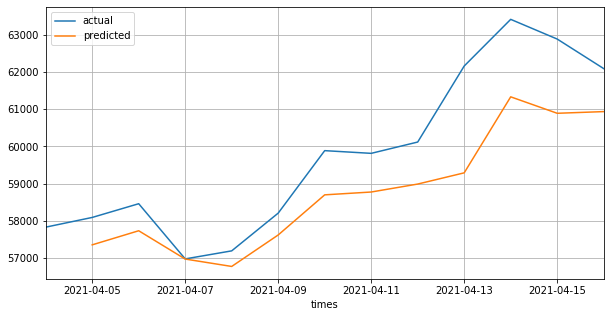

In [112]:
# aggregate to date
gt = ground_true_df.groupby(pd.to_datetime(ground_true_df.times).dt.date)[['value']].mean().reset_index()
gt.columns = ['times', 'actual']
pt = prediction_df.groupby(pd.to_datetime(prediction_df.times).dt.date)[['value']].mean().reset_index()
pt.columns = ['times', 'predicted']
allt = gt.merge(pt, on = 'times', how = 'outer')

allt.set_index('times').plot(figsize=(10,5), grid=True, label = True)

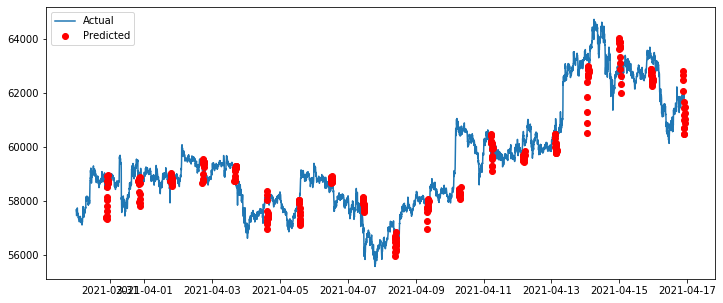

In [41]:
plt.figure(figsize=(12,5))
plt.plot(ground_true_df.times,ground_true_df.value, label = 'Actual')
plt.plot(prediction_df.times,prediction_df.value,'ro', label='Predicted')
plt.legend(loc='upper left')
plt.show()